In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sidepro/reviews_final.csv')
df

,review,game_id,voted_up,votes_up,steam_purchase,received_for_free,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
0,여보세요\n아다 죽었구나\n출발\n\n실종\n실종\n실종,1966720,True,336,True,False,76561198370092561,0,139,2271,364,105.0,1705661929
1,한글패치 하는 법 입니다\n\nhttpsgalldcinsidecommlethalco...,1966720,True,490,True,False,76561198326803695,0,26,33,0,33.0,1703060875
2,무전기에 아무소리도 안들려서 기지로 가봤어요\n그런데 보고 오니 우리기지가 괴물에게...,1966720,True,386,True,False,76561198441927306,175,60,4781,666,369.0,1706182886
3,물건 팔 때 종 열심히 누르면 상을 받을 수 있습니다,1966720,True,216,True,False,76561198414239027,0,8,3631,348,91.0,1705930446
4,h1 한국어 패치 모드 하는법 h1\n\nhttpsgalldcinsidecommga...,1966720,True,199,True,False,76561199063054013,47,15,1059,282,814.0,1706173247
...,...,...,...,...,...,...,...,...,...,...,...,...,...
544605,시작한지 10분만에 끝\n나\n버\n렸\n다,1708190,True,0,True,False,76561198356920789,0,22,13,13,13.0,1705672509
544606,대체 양 한마리는 어디있는거야,1708190,True,0,True,False,76561199096276012,76,5,36,0,36.0,1698983486
544607,100hidden시리즈\n\n100마리의 양 찾기\n\n스팀 트레이딩카드는 없고\n...,1708190,True,0,True,False,76561198293765626,341,456,10,0,10.0,1657422377
544608,그렇게 어렵지 않은 숨은그림찾기 게임,1708190,True,0,True,False,76561198301338257,0,102,15,0,15.0,1635356398


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544610 entries, 0 to 544609
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   review                   544610 non-null  object 
 1   game_id                  544610 non-null  int64  
 2   voted_up                 544610 non-null  bool   
 3   votes_up                 544610 non-null  int64  
 4   steam_purchase           544610 non-null  bool   
 5   received_for_free        544610 non-null  bool   
 6   steamid                  544610 non-null  int64  
 7   num_games_owned          544610 non-null  int64  
 8   num_reviews              544610 non-null  int64  
 9   playtime_forever         544610 non-null  int64  
 10  playtime_last_two_weeks  544610 non-null  int64  
 11  playtime_at_review       521627 non-null  float64
 12  last_played              544610 non-null  int64  
dtypes: bool(3), float64(1), int64(8), object(1)
memory usage: 4

In [ ]:
unique_id = df['game_id'].nunique()
unique_id

3189

In [ ]:
review_counts_per_game = df.groupby('game_id')['review'].count()
review_counts_per_game

game_id
10         412
220        881
240        852
400        876
440        857
          ... 
2748330      1
2749650      2
2749660      2
2753720      5
2756700      2
Name: review, Length: 3189, dtype: int64

In [ ]:
top_200_games = review_counts_per_game.nlargest(200)
top_200_games

game_id
1091500    963
365590     960
305620     958
323190     958
1118010    956
          ... 
261570     890
620980     890
1289310    890
1332010    890
1687950    890
Name: review, Length: 200, dtype: int64

In [ ]:
game_id = 1966720
reviews_count = review_counts_per_game.get(game_id, 0)
print("게임 ID {}의 리뷰 수: {}".format(game_id, reviews_count))

게임 ID 1966720의 리뷰 수: 864


In [ ]:
!pip install konlpy

In [ ]:
import pandas as pd
import random
import re
import os
from konlpy.tag import Okt

basic_path = os.path.dirname(__file__)
basic_file_path = os.path.join(basic_path, 'data')

# 게임 파일 경로
file_path = os.path.join(basic_file_path, 'reviews_final.csv')
df = pd.read_csv(file_path)

# 상위 200개 게임 선택
review_counts_per_game = df['game_id'].value_counts()
top_200_games = review_counts_per_game.nlargest(200)

# 자연어 처리 함수 정의
def preprocess_korean(review):
    # 한글, 숫자만 남기고 제거
    review = re.sub(r'[^가-힣0-9\s]', '', review)
    # 형태소 분석을 위한 Okt 초기화
    okt = Okt()
    # 토큰화
    tokens = okt.morphs(review)
    return tokens

# 상위 게임을 처리하는 함수
def process_top_game(game_id):
    game_reviews = df[df['game_id'] == game_id]['review'].tolist()
    sampled_reviews = random.sample(game_reviews, min(100, len(game_reviews)))
    game_tokens = []
    for review in sampled_reviews:
        processed_review = preprocess_korean(review)
        game_tokens.append(" ".join(processed_review))
    # 토큰화된 리뷰를 파일로 저장
    with open(f"tokenized_reviews_game_{game_id}.txt", "a", encoding="utf-8") as f:
        for token in game_tokens:
            f.write(token + "\n")

# 게임 처리 범위
for game_id in top_200_games.index[180:200]:
    process_top_game(game_id)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sidepro/reviews_final.csv')
review_counts_per_game = df.groupby('game_id')['review'].count()
top_200_games = review_counts_per_game.nlargest(200)
top_200_games.info()

<class 'pandas.core.series.Series'>
Int64Index: 200 entries, 1091500 to 1687950
Series name: review
Non-Null Count  Dtype
--------------  -----
200 non-null    int64
dtypes: int64(1)
memory usage: 3.1 KB


In [ ]:
# 상위 200개 게임의 game_id 추출
top_200_game_ids = top_200_games.index.tolist()

# 추출된 game_id들을 DataFrame으로 변환하여 저장
top_200_game_ids_df = pd.DataFrame(top_200_game_ids, columns=['game_id'])
top_200_game_ids_df.to_csv('/content/drive/MyDrive/sidepro/top_200_game_ids.csv', index=False)

In [ ]:
tags = pd.read_csv('/content/drive/MyDrive/sidepro/final_dataset.csv')
top_200_game_ids_df = pd.read_csv('/content/drive/MyDrive/sidepro/top_200_game_ids.csv')

In [ ]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AppID                     2243 non-null   int64  
 1   Name                      2243 non-null   object 
 2   Genres                    2243 non-null   object 
 3   Tags                      2243 non-null   object 
 4   Positive                  2243 non-null   int64  
 5   Negative                  2243 non-null   int64  
 6   Peak CCU                  2243 non-null   int64  
 7   Required age              2243 non-null   int64  
 8   Price                     2243 non-null   float64
 9   DLC count                 2243 non-null   int64  
 10  Supported languages       2243 non-null   object 
 11  Metacritic score          2243 non-null   int64  
 12  Average playtime forever  2243 non-null   int64  
 13  Median playtime forever   2243 non-null   int64  
 14  Develope

In [ ]:
# 상위 200개 게임의 AppID 목록 가져오기
top_200_app_ids = tags[tags['AppID'].isin(top_200_game_ids_df['game_id'])]['AppID'].unique()

# 빠진 데이터 확인
missing_app_ids = top_200_game_ids_df[~top_200_game_ids_df['game_id'].isin(tags['AppID'])]

print("빠진 데이터:")
print(missing_app_ids)

# 빠진 데이터의 게임 ID에 해당하는 게임 이름 등의 정보를 원한다면:
missing_game_info = df[df['game_id'].isin(missing_app_ids['game_id'])][['game_id']].drop_duplicates()
print("빠진 데이터의 게임 정보:")
print(missing_game_info)

빠진 데이터:
   game_id
4  1118010
빠진 데이터의 게임 정보:
       game_id
58424  1118010


In [ ]:
# 상위 200개 게임의 AppID 목록 가져오기
top_200_app_ids = tags[tags['AppID'].isin(top_200_game_ids_df['game_id'])]['AppID'].unique()

# 겹치는 데이터 필터링
overlap_data = tags[tags['AppID'].isin(top_200_app_ids)]

# 겹치는 데이터에서 필요한 열들만 선택
required_columns = ['AppID', 'Name', 'Genres', 'Tags', 'Positive', 'Negative', 'Developers', 'Publishers', 'About the game', 'Required age', 'Price', 'DLC count', 'Supported languages', 'Metacritic score']
selected_data = overlap_data[required_columns]

In [ ]:
selected_data

,AppID,Name,Genres,Tags,Positive,Negative,Developers,Publishers,About the game,Required age,Price,DLC count,Supported languages,Metacritic score
1,578080,PUBG: BATTLEGROUNDS,"['Action', ' Adventure', ' Free to Play', ' Ma...","['Action', 'Battle Royale', 'Competitive', 'Di...",1337934,967003,['KRAFTON'],['KRAFTON'],"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",0,0.00,0,"['English', 'Korean', 'Simplified Chinese', 'F...",0
2,230410,Warframe,"['Action', ' Free to Play', ' RPG']","['Action', 'Action RPG', 'Character Customizat...",493411,75820,['Digital Extremes'],['Digital Extremes'],Confront warring factions throughout a sprawli...,17,0.00,16,"['English', 'German', 'French', 'Italian', 'Ko...",69
3,1086940,Baldur's Gate 3,"['Adventure', ' RPG', ' Strategy', ' Early Acc...","['Adventure', 'CRPG', 'Character Customization...",545583,18176,['Larian Studios'],['Larian Studios'],"Gather your party, and return to the Forgotten...",17,59.99,0,"['English', 'French', 'German', 'Spanish - Spa...",0
6,271590,Grand Theft Auto V,"['Action', ' Adventure']","['Action', 'Adventure', 'Atmospheric', 'Automo...",1510259,234122,['Rockstar North'],['Rockstar Games'],"When a young street hustler, a retired bank ro...",17,29.98,1,"['English', 'French', 'Italian', 'German', 'Sp...",96
7,1562700,SANABI,"['Action', ' Adventure', ' Indie', ' Early Acc...","['2D', '2D Platformer', 'Action', 'Action-Adve...",19650,504,['WONDER POTION'],['NEOWIZ'],"You, a legendary retired veteran, are called u...",0,14.99,0,"['English', 'Korean', 'Simplified Chinese', 'R...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,1289310,Helltaker,"['Adventure', ' Free to Play', ' Indie']","['2D', 'Adventure', 'Anime', 'Cute', 'Dating S...",114216,2523,['vanripper'],['vanripper'],You woke up one day with a dream. Harem full o...,0,0.00,1,['English'],0
1619,232090,Killing Floor 2,['Action'],"['Action', 'Atmospheric', 'Character Customiza...",103631,14404,['Tripwire Interactive'],['Tripwire Interactive'],"In KILLING FLOOR 2, players descend into conti...",17,29.99,3,"['English', 'French', 'Italian', 'German', 'Sp...",75
1760,1139900,Ghostrunner,['Action'],"['Action', 'Action-Adventure', 'Adventure', 'C...",53281,4955,"['One More Level', '3D Realms', 'Slipgate Iron...",['505 Games'],Ghostrunner is a hardcore FPP slasher packed w...,17,29.99,7,"['English', 'French', 'Italian', 'German', 'Ja...",81
1781,207610,The Walking Dead,['Adventure'],"['Action', 'Adventure', 'Atmospheric', 'Cartoo...",64554,1863,['Telltale Games'],['Skybound Games'],The Walking Dead is a five-part game series se...,17,14.99,1,"['English', 'French', 'Italian', 'German', 'Sp...",82


In [ ]:
selected_data.to_csv('review_tag.csv', index=False)

In [ ]:
review_tag = pd.read_csv('/content/drive/MyDrive/sidepro/review_tag.csv')
review_tag

,AppID,Name,Genres,Tags,Positive,Negative,Developers,Publishers,About the game,Required age,Price,DLC count,Supported languages,Metacritic score
0,578080,PUBG: BATTLEGROUNDS,"['Action', ' Adventure', ' Free to Play', ' Ma...","['Action', 'Battle Royale', 'Competitive', 'Di...",1337934,967003,['KRAFTON'],['KRAFTON'],"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",0,0.00,0,"['English', 'Korean', 'Simplified Chinese', 'F...",0
1,230410,Warframe,"['Action', ' Free to Play', ' RPG']","['Action', 'Action RPG', 'Character Customizat...",493411,75820,['Digital Extremes'],['Digital Extremes'],Confront warring factions throughout a sprawli...,17,0.00,16,"['English', 'German', 'French', 'Italian', 'Ko...",69
2,1086940,Baldur's Gate 3,"['Adventure', ' RPG', ' Strategy', ' Early Acc...","['Adventure', 'CRPG', 'Character Customization...",545583,18176,['Larian Studios'],['Larian Studios'],"Gather your party, and return to the Forgotten...",17,59.99,0,"['English', 'French', 'German', 'Spanish - Spa...",96
3,1118010,Monster Hunter World: Iceborne,['Action'],"['Action', 'Multiplayer', 'Open World', 'Hunti...",12302,9202,['CAPCOM Co'],['CAPCOM Co'],Monster Hunter World: Iceborne – a massive new...,15,39.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",89
4,271590,Grand Theft Auto V,"['Action', ' Adventure']","['Action', 'Adventure', 'Atmospheric', 'Automo...",1510259,234122,['Rockstar North'],['Rockstar Games'],"When a young street hustler, a retired bank ro...",17,29.98,1,"['English', 'French', 'Italian', 'German', 'Sp...",96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1289310,Helltaker,"['Adventure', ' Free to Play', ' Indie']","['2D', 'Adventure', 'Anime', 'Cute', 'Dating S...",114216,2523,['vanripper'],['vanripper'],You woke up one day with a dream. Harem full o...,0,0.00,1,['English'],0
196,232090,Killing Floor 2,['Action'],"['Action', 'Atmospheric', 'Character Customiza...",103631,14404,['Tripwire Interactive'],['Tripwire Interactive'],"In KILLING FLOOR 2, players descend into conti...",17,29.99,3,"['English', 'French', 'Italian', 'German', 'Sp...",75
197,1139900,Ghostrunner,['Action'],"['Action', 'Action-Adventure', 'Adventure', 'C...",53281,4955,"['One More Level', '3D Realms', 'Slipgate Iron...",['505 Games'],Ghostrunner is a hardcore FPP slasher packed w...,17,29.99,7,"['English', 'French', 'Italian', 'German', 'Ja...",81
198,207610,The Walking Dead,['Adventure'],"['Action', 'Adventure', 'Atmospheric', 'Cartoo...",64554,1863,['Telltale Games'],['Skybound Games'],The Walking Dead is a five-part game series se...,17,14.99,1,"['English', 'French', 'Italian', 'German', 'Sp...",82


In [ ]:
review_tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AppID                200 non-null    int64  
 1   Name                 200 non-null    object 
 2   Genres               200 non-null    object 
 3   Tags                 200 non-null    object 
 4   Positive             200 non-null    int64  
 5   Negative             200 non-null    int64  
 6   Developers           200 non-null    object 
 7   Publishers           200 non-null    object 
 8   About the game       200 non-null    object 
 9   Required age         200 non-null    int64  
 10  Price                200 non-null    float64
 11  DLC count            200 non-null    int64  
 12  Supported languages  200 non-null    object 
 13  Metacritic score     200 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 22.0+ KB


<ipython-input-52-cb8c0110c86f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = review_tag.corr()


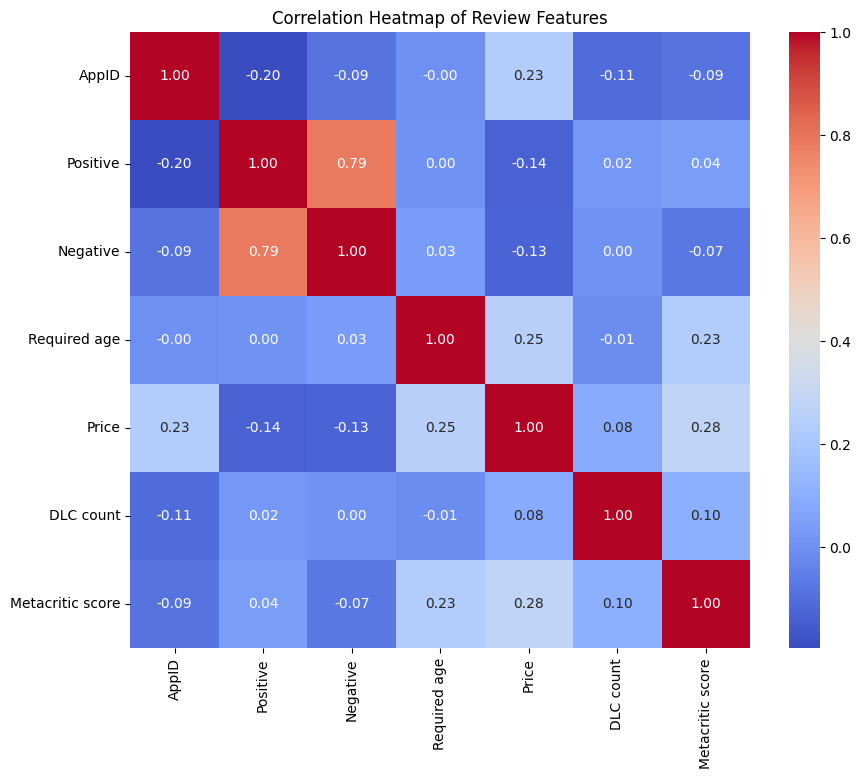

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# 상관 행렬 계산
correlation_matrix = review_tag.corr()

# 상관 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Review Features')
plt.show()

In [ ]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 주어진 경로 설정
file_path = "/content/drive/MyDrive/sidepro/token/"

# 토큰화된 리뷰 데이터 불러오기
# 여기서는 토큰화된 리뷰 데이터를 하나의 데이터프레임에 모두 합칩니다.
df_tokenized_reviews = pd.DataFrame(columns=['game_id', 'tokenized_review'])

for file_name in os.listdir(file_path):
    if file_name.startswith('tokenized_reviews_game_') and file_name.endswith('.txt'):
        game_id = int(file_name.split('_')[-1].split('.')[0])
        try:
            with open(os.path.join(file_path, file_name), 'r', encoding='utf-8') as file:
                tokenized_review = file.read()
            df_tokenized_reviews = df_tokenized_reviews.append({'game_id': game_id, 'tokenized_review': tokenized_review}, ignore_index=True)
        except Exception as e:
            print(f"Error occurred while reading file {file_name}: {e}")

# 리뷰 태그 데이터 불러오기
df_tags = pd.read_csv('/content/drive/MyDrive/sidepro/review_tag.csv')

# 새로운 데이터셋 (final_dataset.csv) 불러오기
df_new = pd.read_csv('/content/drive/MyDrive/sidepro/final_dataset.csv')

# 리뷰 및 태그 데이터를 새로운 데이터셋에 추가
df_new_merged = pd.merge(df_new, df_tags, left_on='AppID', right_on='AppID')
df_new_merged = pd.merge(df_new_merged, df_tokenized_reviews, left_on='AppID', right_on='game_id')

In [72]:
# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_new = tfidf_vectorizer.fit_transform(df_new_merged['tokenized_review'])

In [73]:
# 유사도 행렬 생성
cosine_sim_new = cosine_similarity(tfidf_matrix_new, tfidf_matrix_new)

In [77]:
# 게임 추천 함수
def recommend_games_new(game_name, cosine_sim=cosine_sim_new):
    idx = df_new_merged[df_new_merged['Name_x'] == game_name].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # 상위 10개 유사한 게임 선택
    game_indices = [i[0] for i in sim_scores]
    return df_new_merged['Name_x'].iloc[game_indices]

In [80]:
# 사용자에게 추천할 게임 이름 입력
user_selected_game = 'SANABI'

# 게임 추천
recommended_games_new = recommend_games_new(user_selected_game)
print("Recommended Games:")
print(recommended_games_new)

Recommended Games:
99                     Undertale
175                  To the Moon
18                Cyberpunk 2077
177        Detroit: Become Human
171               NieR:Automata™
73     The Witcher® 3: Wild Hunt
196             The Walking Dead
133             Library Of Ruina
90                       Forager
167                    Days Gone
Name: Name_x, dtype: object


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

# 데이터 불러오기
df_final_dataset = pd.read_csv('/content/drive/MyDrive/sidepro/final_dataset.csv')

# 리뷰 태그 데이터 불러오기
df_tags = pd.read_csv('/content/drive/MyDrive/sidepro/review_tag.csv')

# 토큰화된 리뷰 데이터 불러오기
df_tokenized_reviews = pd.DataFrame(columns=['game_id', 'tokenized_review'])

# 주어진 경로 설정
file_path = "/content/drive/MyDrive/sidepro/token/"

for file_name in os.listdir(file_path):
    if file_name.startswith('tokenized_reviews_game_') and file_name.endswith('.txt'):
        game_id = int(file_name.split('_')[-1].split('.')[0])
        try:
            with open(os.path.join(file_path, file_name), 'r', encoding='utf-8') as file:
                tokenized_review = file.read()
            df_tokenized_reviews = df_tokenized_reviews.append({'game_id': game_id, 'tokenized_review': tokenized_review}, ignore_index=True)
        except Exception as e:
            print(f"Error occurred while reading file {file_name}: {e}")

# 리뷰 및 태그 데이터를 final_dataset에 추가
df_final_dataset_merged = pd.merge(df_final_dataset, df_tags, left_on='AppID', right_on='AppID')
df_final_dataset_merged = pd.merge(df_final_dataset_merged, df_tokenized_reviews, left_on='AppID', right_on='game_id')

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(df_final_dataset_merged['tokenized_review'])

# 모델 학습
knn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
knn_model.fit(X)

# 게임 추천 함수
def recommend_games_based_on_input_game(game_name, model=knn_model):
    idx = df_final_dataset_merged[df_final_dataset_merged['Name_x'] == game_name].index[0]
    distances, indices = model.kneighbors(X[idx], n_neighbors=10)
    similar_games = df_final_dataset_merged.iloc[indices[0][1:]]['Name_x']
    return similar_games


In [ ]:
# 사용자에게 추천할 게임 이름 입력
user_selected_game = input("Enter the game name: ")

# 게임 추천
recommended_games_based_on_input_game = recommend_games_based_on_input_game(user_selected_game)
print("Recommended Games Based on Input Game:")
print(recommended_games_based_on_input_game)

In [153]:
df = pd.read_csv('/content/drive/MyDrive/sidepro/final_dataset.csv')

In [ ]:
# 새로운 컬럼 생성
df['Tags_concatenated'] = df['Tags'].astype(str).str.replace("[","").str.replace("]","").str.replace("'","").str.replace(", ", ",")
df['Genres_concatenated'] = df['Genres'].astype(str).str.replace("[","").str.replace("]","").str.replace("'","").str.replace(", ", ",")
df['Developers_concatenated'] = df['Developers'].astype(str).str.replace("[","").str.replace("]","").str.replace("'","").str.replace(", ", ",")
df['Publishers_concatenated'] = df['Publishers'].astype(str).str.replace("[","").str.replace("]","").str.replace("'","").str.replace(", ", ",")
df['Supported_languages_concatenated'] = df['Supported languages'].astype(str).str.replace("[","").str.replace("]","").str.replace("'","").str.replace(", ", ",")

# 쉼표 뒤의 띄어쓰기 제거
df['Tags_concatenated'] = df['Tags_concatenated'].str.replace(", ", ",")
df['Genres_concatenated'] = df['Genres_concatenated'].str.replace(", ", ",")
df['Developers_concatenated'] = df['Developers_concatenated'].str.replace(", ", ",")
df['Publishers_concatenated'] = df['Publishers_concatenated'].str.replace(", ", ",")
df['Supported_languages_concatenated'] = df['Supported_languages_concatenated'].str.replace(", ", ",")

In [155]:
df.drop(['Genres', 'Tags', 'Developers', 'Publishers', 'Supported languages'], axis=1, inplace=True)

In [156]:
df.rename(columns={'Genres_concatenated': 'Genres', 'Tags_concatenated': 'Tags', 'Developers_concatenated' : 'Developers', 'Publishers_concatenated':'Publishers', 'Supported_languages_concatenated':'Supported languages'}, inplace=True)

In [158]:
df.to_csv('nolist_final_dataset.csv', index=False)

In [157]:
df

,AppID,Name,Positive,Negative,Peak CCU,Required age,Price,DLC count,Metacritic score,Average playtime forever,Median playtime forever,About the game,Rank,Tags,Genres,Developers,Publishers,Supported languages
0,1966720,Lethal Company,329641,7582,169110,0,9.99,0,0,472,328,You are a contracted worker for the Company. Y...,1,"Action,Action-Adventure,Adventure,Aliens,Atmos...","Action,Adventure,Indie,Early Access",Zeekerss,Zeekerss,English
1,578080,PUBG: BATTLEGROUNDS,1337934,967003,275374,0,0.00,0,0,21963,7134,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",2,"Action,Battle Royale,Competitive,Difficult,Ear...","Action,Adventure,Free to Play,Massively Multip...",KRAFTON,KRAFTON,"English,Korean,Simplified Chinese,French,Germa..."
2,230410,Warframe,493411,75820,60270,17,0.00,16,69,9533,413,Confront warring factions throughout a sprawli...,3,"Action,Action RPG,Character Customization,FPS,...","Action,Free to Play,RPG",Digital Extremes,Digital Extremes,"English,German,French,Italian,Korean,Spanish -..."
3,1086940,Baldur's Gate 3,545583,18176,4340,17,59.99,0,0,1876,976,"Gather your party, and return to the Forgotten...",4,"Adventure,CRPG,Character Customization,Choices...","Adventure,RPG,Strategy,Early Access",Larian Studios,Larian Studios,"English,French,German,Spanish - Spain,Polish,R..."
4,2195250,EA SPORTS FC™ 24,28051,22504,52328,0,69.99,0,0,6667,5884,This game includes optional in-game purchases ...,5,"3D,Action,Competitive,Controller,Early Access,...","Simulation,Sports",EA Canada & EA Romania,Electronic Arts,"English,French,Italian,German,Spanish - Spain,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,1788410,BOT.vinnik Chess: Mid-Century USSR Championships,28,1,0,0,0.99,0,0,0,0,Improve your chess knowledge and learn some hi...,2423,"Artificial Intelligence,Atmospheric,Board Game...","Casual,Indie,Strategy",Deep Green Games,Abyssal Studios,English
2239,1986230,What if your girl was a frog?,223,25,0,0,0.99,1,0,0,0,There was a frog. She was cheerfully croaking ...,2424,"2D,Anime,Atmospheric,Cartoon,Colorful,Cute,Emo...","Casual,Indie",Hunny Bunny Studio,Hunny Bunny Studio,"English,French,German,Spanish - Spain,Spanish ..."
2240,592730,Aerial Destruction,108,66,0,0,8.99,0,0,136,136,Aerial Destruction is a helicopter game set du...,2425,"Action,Flight,Indie,Simulation,Strategy","Action,Casual,Indie,Simulation,Strategy",Devdan Games,Devdan Games,English
2241,1708190,100 hidden rams,271,3,0,0,0.99,0,0,0,0,Art by Аlexandr Telminov Important information...,2426,"Adventure,2D,Agriculture,Clicker,Creature Coll...","Adventure,Casual,Indie","Anatoliy Loginovskikh,Аlexandr Telminov",Anatoliy Loginovskikh,English


In [160]:
tag = pd.read_csv('/content/drive/MyDrive/sidepro/review_tag.csv')

In [161]:
# 새로운 컬럼 생성
tag['Tags_concatenated'] = tag['Tags'].astype(str).str.replace("[","").str.replace("]","").str.replace("'","").str.replace(", ", ",")
tag['Genres_concatenated'] = tag['Genres'].astype(str).str.replace("[","").str.replace("]","").str.replace("'","").str.replace(", ", ",")
tag['Developers_concatenated'] = tag['Developers'].astype(str).str.replace("[","").str.replace("]","").str.replace("'","").str.replace(", ", ",")
tag['Publishers_concatenated'] = tag['Publishers'].astype(str).str.replace("[","").str.replace("]","").str.replace("'","").str.replace(", ", ",")
tag['Supported_languages_concatenated'] = tag['Supported languages'].astype(str).str.replace("[","").str.replace("]","").str.replace("'","").str.replace(", ", ",")

# 쉼표 뒤의 띄어쓰기 제거
tag['Tags_concatenated'] = tag['Tags_concatenated'].str.replace(", ", ",")
tag['Genres_concatenated'] = tag['Genres_concatenated'].str.replace(", ", ",")
tag['Developers_concatenated'] = tag['Developers_concatenated'].str.replace(", ", ",")
tag['Publishers_concatenated'] = tag['Publishers_concatenated'].str.replace(", ", ",")
tag['Supported_languages_concatenated'] = tag['Supported_languages_concatenated'].str.replace(", ", ",")

<ipython-input-161-22358ca15075>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tag['Tags_concatenated'] = tag['Tags'].astype(str).str.replace("[","").str.replace("]","").str.replace("'","").str.replace(", ", ",")
<ipython-input-161-22358ca15075>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tag['Genres_concatenated'] = tag['Genres'].astype(str).str.replace("[","").str.replace("]","").str.replace("'","").str.replace(", ", ",")
<ipython-input-161-22358ca15075>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tag['Dev

In [162]:
tag.drop(['Genres', 'Tags', 'Developers', 'Publishers', 'Supported languages'], axis=1, inplace=True)

In [163]:
tag.rename(columns={'Genres_concatenated': 'Genres', 'Tags_concatenated': 'Tags', 'Developers_concatenated' : 'Developers', 'Publishers_concatenated':'Publishers', 'Supported_languages_concatenated':'Supported languages'}, inplace=True)

In [164]:
tag.to_csv('nolist_review_tag.csv', index=False)

In [165]:
tag

,AppID,Name,Positive,Negative,About the game,Required age,Price,DLC count,Metacritic score,Tags,Genres,Developers,Publishers,Supported languages
0,578080,PUBG: BATTLEGROUNDS,1337934,967003,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",0,0.00,0,0,"Action,Battle Royale,Competitive,Difficult,Ear...","Action,Adventure,Free to Play,Massively Multip...",KRAFTON,KRAFTON,"English,Korean,Simplified Chinese,French,Germa..."
1,230410,Warframe,493411,75820,Confront warring factions throughout a sprawli...,17,0.00,16,69,"Action,Action RPG,Character Customization,FPS,...","Action,Free to Play,RPG",Digital Extremes,Digital Extremes,"English,German,French,Italian,Korean,Spanish -..."
2,1086940,Baldur's Gate 3,545583,18176,"Gather your party, and return to the Forgotten...",17,59.99,0,96,"Adventure,CRPG,Character Customization,Choices...","Adventure,RPG,Strategy,Early Access",Larian Studios,Larian Studios,"English,French,German,Spanish - Spain,Polish,R..."
3,1118010,Monster Hunter World: Iceborne,12302,9202,Monster Hunter World: Iceborne – a massive new...,15,39.99,0,89,"Action,Multiplayer,Open World,Hunting,Difficul...",Action,CAPCOM Co,CAPCOM Co,"English,French,Italian,German,Spanish - Spain"
4,271590,Grand Theft Auto V,1510259,234122,"When a young street hustler, a retired bank ro...",17,29.98,1,96,"Action,Adventure,Atmospheric,Automobile Sim,Cr...","Action,Adventure",Rockstar North,Rockstar Games,"English,French,Italian,German,Spanish - Spain,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1289310,Helltaker,114216,2523,You woke up one day with a dream. Harem full o...,0,0.00,1,0,"2D,Adventure,Anime,Cute,Dating Sim,Demons,Diff...","Adventure,Free to Play,Indie",vanripper,vanripper,English
196,232090,Killing Floor 2,103631,14404,"In KILLING FLOOR 2, players descend into conti...",17,29.99,3,75,"Action,Atmospheric,Character Customization,Dar...",Action,Tripwire Interactive,Tripwire Interactive,"English,French,Italian,German,Spanish - Spain,..."
197,1139900,Ghostrunner,53281,4955,Ghostrunner is a hardcore FPP slasher packed w...,17,29.99,7,81,"Action,Action-Adventure,Adventure,Combat,Cyber...",Action,"One More Level,3D Realms,Slipgate Ironworks™,A...",505 Games,"English,French,Italian,German,Japanese,Polish,..."
198,207610,The Walking Dead,64554,1863,The Walking Dead is a five-part game series se...,17,14.99,1,82,"Action,Adventure,Atmospheric,Cartoon,Choices M...",Adventure,Telltale Games,Skybound Games,"English,French,Italian,German,Spanish - Spain"


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 토큰화된 리뷰 데이터 불러오기
df_tokenized_reviews = pd.DataFrame(columns=['game_id', 'tokenized_review'])

# 주어진 경로 설정
file_path = "/content/drive/MyDrive/sidepro/token/"

for file_name in os.listdir(file_path):
    if file_name.startswith('tokenized_reviews_game_') and file_name.endswith('.txt'):
        game_id = int(file_name.split('_')[-1].split('.')[0])
        try:
            with open(os.path.join(file_path, file_name), 'r', encoding='utf-8') as file:
                tokenized_review = file.read()
            df_tokenized_reviews = df_tokenized_reviews.append({'game_id': game_id, 'tokenized_review': tokenized_review}, ignore_index=True)
        except Exception as e:
            print(f"Error occurred while reading file {file_name}: {e}")

# review_tag 데이터 불러오기
df_tags = pd.read_csv('/content/drive/MyDrive/sidepro/nolist_review_tag.csv')

# final_dataset.csv 불러오기
df_final_dataset = pd.read_csv('/content/drive/MyDrive/sidepro/nolist_final_dataset.csv')

In [180]:
# review_tag 데이터와 토큰화된 리뷰 데이터 병합
merged_df = pd.merge(df_tags, df_tokenized_reviews, left_on='AppID', right_on='game_id', how='inner')

# final_dataset에 있는 게임의 평가를 예측하기 위한 모델 학습
# 사용할 특성(feature)들 선택 (예: 태그, 장르, 메타크리틱 점수 등)
# X에는 특성들, y에는 목표 변수(좋음 또는 나쁨 등) 설정

# X에는 특성들을, y에는 목표 변수를 지정합니다.
X = merged_df[['Tags', 'Metacritic score']]  # 'Genres' 열을 제외하고 선택합니다.
y = merged_df['Positive']  # 목표 변수로 'Positive'를 선택합니다.

# 'Tags' 열을 추가합니다.
X.loc[:, 'Tags'] = merged_df['Tags'].copy()

# 'Tags' 열의 태그들을 원-핫 인코딩합니다.
tags_encoded = X['Tags'].str.get_dummies(sep=',')

# 기존 특성과 태그를 인코딩한 데이터를 병합합니다.
X = pd.concat([X.drop(columns=['Tags']), tags_encoded], axis=1)

# 학습 데이터와 테스트 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 분류기를 사용하여 모델을 학습합니다.
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 학습된 모델을 사용하여 final_dataset.csv에 있는 게임에 대한 평가를 진행합니다.
# final_dataset에 있는 게임의 특성들을 선택하여 모델에 입력하고, 예측 결과를 확인합니다.


<ipython-input-180-9ba1e10375e4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'Tags'] = merged_df['Tags'].copy()


RandomForestClassifier()

In [191]:
tags_encoded

,1980s,2.5D,2D,2D Fighter,2D Platformer,3D,3D Fighter,3D Platformer,3D Vision,4 Player Local,...,Voxel,Walking Simulator,War,Wargame,Warhammer 40K,Western,Wholesome,World War II,Zombies,eSports
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [182]:
from sklearn.metrics import accuracy_score

# 테스트 데이터에 대한 예측을 수행합니다.
y_pred = model.predict(X_test)

# 정확도를 계산합니다.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0


In [190]:
# 선택한 게임에 대한 정보
selected_game_tags = "Action,Adventure"  # 예시로 태그 정보를 지정합니다.
selected_game_metacritic_score = 80  # 예시로 메타크리틱 점수를 지정합니다.

# 선택한 게임의 태그 정보를 원-핫 인코딩합니다.
selected_game_tags_encoded = pd.Series(selected_game_tags).str.get_dummies(sep=',')
# 선택한 게임의 메타크리틱 점수를 DataFrame으로 변환합니다.
selected_game_metacritic_score_df = pd.DataFrame({'Metacritic score': [selected_game_metacritic_score]})

# 선택한 게임의 특성을 모델이 사용한 형식에 맞게 합칩니다.
selected_game_features = pd.concat([selected_game_tags_encoded, selected_game_metacritic_score_df], axis=1)

# 모델을 사용하여 선택한 게임에 대한 평가를 예측합니다.
prediction = model.predict(selected_game_features)

# 예측 결과 출력
print("Predicted Evaluation for the Selected Game:", prediction)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- 1980s
- 2.5D
- 2D
- 2D Fighter
- 2D Platformer
- ...
